<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [129]:
# A:
df= pd.read_csv(sac_csv)


In [130]:
with pd.option_context('display.max_rows', 999):
    display(df)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [131]:
df.shape

(985, 12)

In [132]:
# A:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [136]:
#
# df.info()
#df.dtypes
df.zip=df.zip.astype(str)
df.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [137]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [138]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [139]:
df['sq__ft']=df['sq__ft'].abs()
df['price']=df['price'].abs()

In [140]:
df.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,0.038315,-0.048107
baths,0.839650,1.000000,0.665690,0.416208,0.020946,-0.027232
sq__ft,0.684041,0.665690,1.000000,0.333897,0.001451,-0.017198
price,0.342024,0.416208,0.333897,1.000000,0.004220,0.002361
latitude,0.038315,0.020946,0.001451,0.004220,1.000000,-0.998927
longitude,-0.048107,-0.027232,-0.017198,0.002361,-0.998927,1.000000


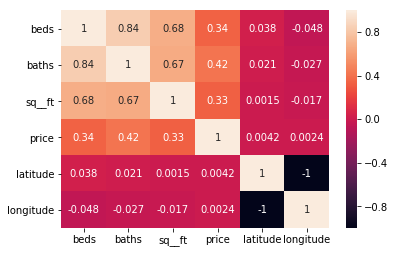

In [142]:
sns.heatmap(df.corr(),annot=True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

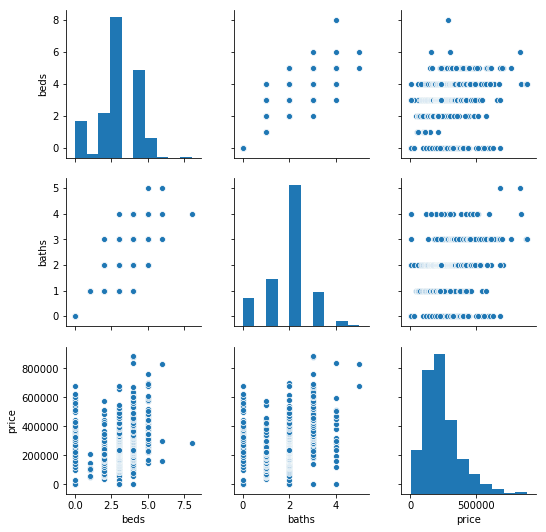

In [145]:
sns.pairplot(df, vars=['beds','baths','price'])


In [146]:
a=df[df["baths"]==0]
b=df[df["beds"]==0]
c=df[df["sq__ft"]==0]
print(a.shape,b.shape,c.shape)


(108, 12) (108, 12) (171, 12)


In [147]:
df= df[df['sq__ft']!=0]

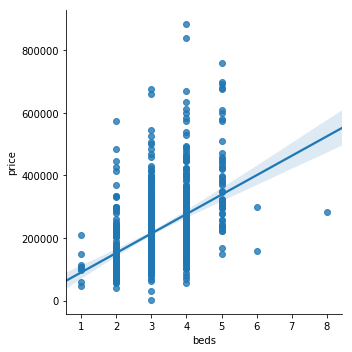

In [148]:
# A:linear regression x is changing and y= price
sns.lmplot(x='beds', y='price', data=df)



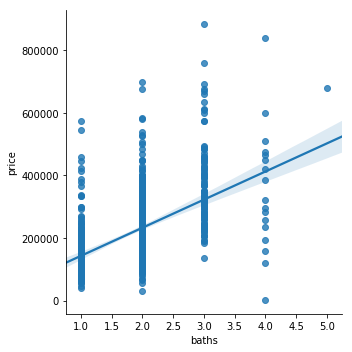

In [149]:
sns.lmplot(x='baths', y='price', data=df)


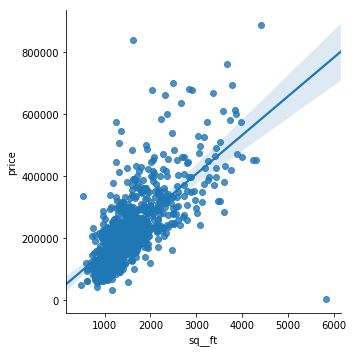

In [150]:
sns.lmplot(x='sq__ft', y='price', data=df)


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [151]:
# A:if we want to take the best predictor from the corletion it will be (beds)
#, but the graphs shwoes that the sqft is the better value for predicting the price
# because, must of the observitions lay on the regression line 

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

Recall that the formula for RSS/SSE/SSR is:
### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

And the formula to optimize RSS/SSE/SSR is: 

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

The equations for the intercept ($ \hat{\beta}_0 $) and slope ($ \hat{\beta}_1 $) that minimize the RSS is:

### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$


In [152]:
# A:
def sls_fit_pd(df, X, Y):
    y_bar = df[Y].mean()
    x_bar = df[X].mean()
    std_y = df[Y].std()
    std_x = df[X].std()
    r_xy = df.corr().loc[X, Y]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1

In [153]:
df1 = pd.DataFrame({'X':df['sq__ft'], 'Y':df['price']})
result_2 = sls_fit_pd(df1, 'X', 'Y')
result_2

(30210.633866919117, 125.21648667984451)

### 6. What does the value of the intercept mean? What does the value of the slope mean?

In [96]:
# # A:
# the slope represent the change of the target value over the change of the indeprndent varible 
# and the intercipt is the least value that the target value takes 

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [97]:
# # A:
# prediction: we can predict the price by the sqft of new real state 
# inference: to understand the relationship between the price and sqft ,(how the sqft affect on the price)

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [98]:
# A:

---

> The material following this point can be completed after the lesson on multiple linear regression (MLR).

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [99]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [100]:
# A:
dfd=pd.get_dummies(df,columns=['type'])

dfd.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,0 95838\n1 95823\n2 95815\n3 ...,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from the dataframe containing our dummies. Append the rest to the original data.

In [101]:
# A:

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model, don't forget to load in the sklearn api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [102]:
# A:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [104]:
y=dfd.price
x1= dfd[['sq__ft']]
x2= dfd[['type_Residential']]
x3= dfd[['beds']]

In [105]:
dfd.corr()['price']

beds                 0.441988
baths                0.501820
sq__ft               0.693708
price                1.000000
latitude             0.006737
longitude            0.000517
type_Condo          -0.185495
type_Multi-Family   -0.005227
type_Residential     0.166090
Name: price, dtype: float64

In [106]:
col = ['sq__ft','type_Residential','beds']

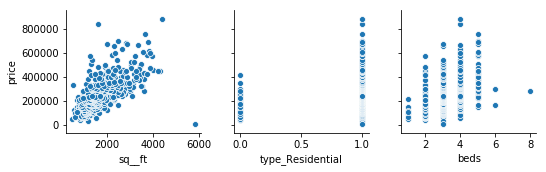

In [155]:
sns.pairplot(dfd, x_vars=col, y_vars='price')

In [156]:
x=dfd[col]
x.head()

,sq__ft,type_Residential,beds
0,836,1,2
1,1167,1,3
2,796,1,2
3,852,1,2
4,797,1,2


In [157]:
lr= LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
lr.score(x,y)

0.4903541344866172

In [159]:
dfd['predicted price'] = lr.predict(x)
dfd['predicted price'].head()

0    146941.325772
1    177911.211030
2    141520.117317
3    149109.809154
4    141655.647528
Name: predicted price, dtype: float64

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

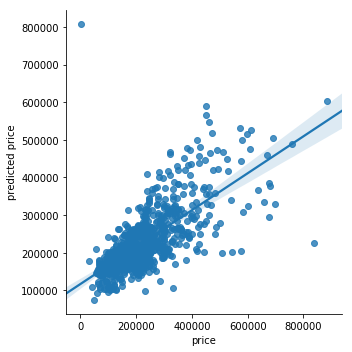

In [160]:
sns.lmplot(x='price',y='predicted price',data=dfd)

In [161]:
# A:


### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [162]:
# # A:
# Linearity:  𝑌  must have an approximately linear relationship with each independent  𝑋𝑖 .
# Independence: Errors (residuals)  𝜀𝑖  and  𝜀𝑗  must be independent of one another for any  𝑖≠𝑗 .
# Normality: The errors (residuals) follow a Normal distribution with mean 0.
# Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the  𝑋𝑖  predictors. (There should be no discernable relationship between the  𝑋  predictors and the residuals.)
# Independence of Predictors: The independent variables  𝑋𝑖  and  𝑋𝑗  must be independent of one another for any  𝑖≠𝑗 .

### 14. Choose two (2) of the assumptions in 13. Do you believe your data meet those assumptions? Why or Why Not?

In [ ]:
# A:


### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the lesson on regression metrics.

---

### 16. Regression Metrics

Build a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. You may _not_ use the built-in functions that calculate it for you. You may use aggregating functions like `np.sum` or `np.mean`.

In [ ]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  You may use built in `sklearn` functions. The output should look like:

``` python
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    And so forth...
    ```
  

In [177]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score



In [180]:
# A:
#max_error metric calculates the maximum residual error.
def regmet(x,y):
    #print('max_error metric= ',sklearn.metrics.max_error(y_true, y_pred))#
    print('Mean absolute error regression loss',mean_absolute_error(dfd.price,dfd['predicted price']))
    print('mean_squared_error',mean_squared_error(dfd.price,dfd['predicted price']))
    print('mean_squared_log_error',mean_squared_log_error(dfd.price,dfd['predicted price']))
    print('median_absolute_error ',median_absolute_error(dfd.price,dfd['predicted price']))
    print('r2_score',r2_score(dfd.price,dfd['predicted price']))
#add a sixth

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [181]:
# A:
regmet(dfd.price,dfd['predicted price'])

Mean absolute error regression loss 59061.70804662166
mean_squared_error 7308591645.5333805
mean_squared_log_error 0.16660003351463296
median_absolute_error  46658.35981007804
r2_score 0.49035413448661724


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [124]:
# A:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=.3,shuffle = True)
lr.fit(X_train, y_train)
print('test score: ' ,lr.score(X_test, y_test))
print('train score: ' ,lr.score(X_train, y_train))

test score:  0.3581214005780238
train score:  0.5346681557417359


In [ ]:
#from the cross validition the model is baised 